In [48]:
import pickle as pkl
import os
import numpy as np
import networkx as nx

data_path = '/home/laixin/code/DropEdge/data'
data_file = os.path.join(data_path, 'ind.cora.graph')
data =[]
with open(data_file, 'rb') as f:
    data.append(pkl.load(f, encoding='latin1'))

graph = data[0]
G = nx.from_dict_of_lists(graph)
adj = nx.adjacency_matrix(G)
#print(adj.shape)

degree = np.sum(adj, axis=1)
print(degree)

# index_file = os.path.join(data_path, 'ind.cora.test.index')
# index = []
# for line in open(index_file):
#     index.append(int(line.strip()))
# print(index)



[[3]
 [3]
 [5]
 ...
 [1]
 [4]
 [4]]


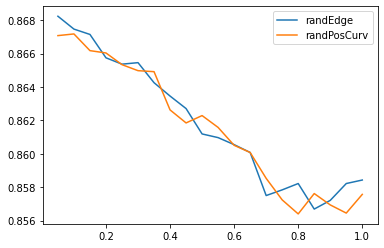

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def mean_result(result_file):
    result_arr = np.zeros((20, 100))
    lines = open(result_file).readlines()
    M, N = result_arr.shape
    for i in range(M * N):
        result_arr[i % M][i // M] = float(lines[i].strip().split()[1])
    return np.mean(result_arr, axis=1)

result_file = '/home/laixin/code/DropEdge/inceptiongcn_result_cora_benchmark.txt'
benchmark = mean_result(result_file)
result_file = '/home/laixin/code/DropEdge/inceptiongcn_result_cora_randomPositive.txt'
randPos = mean_result(result_file)

fig, ax = plt.subplots()
x = np.arange(0.05, 1.01, 0.05)
line1, = ax.plot(x, benchmark, label='randEdge')
line2, = ax.plot(x, randPos, label='randPosCurv')
ax.legend()
plt.show()


2165


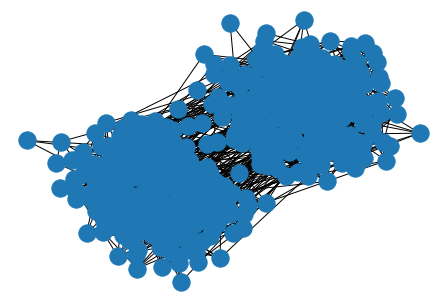

In [1]:
import networkx as nx
import torch
import matplotlib.pyplot as plt

def load_SBM(sizes, probs):
    G = nx.stochastic_block_model(sizes, probs)
    blocks = nx.get_node_attributes(G, 'block')
    #print(torch.tensor(list(blocks.values())))
    print(G.number_of_edges())
    #print(nx.adjacency_matrix(G))
    pos = nx.spring_layout(G, seed=24)
    nx.draw(G, pos)
    plt.draw()

load_SBM([200, 200], [[0.05, 0.005], [0.005, 0.05]])

In [4]:
import random
pop = [-1,-2,3,4]
weights = [8, -6, -7, 8]
chosen = []
chose_num = 2
for i in range(chose_num):
    a = random.choices(pop, weights=np.exp(weights))
    chosen.append(a)

print(a)

[4]


In [9]:
sampleList = [100, 200, 300, 400, 500]
randomNumberList = np.random.choice(
  sampleList, 3, p=[0.05, 0.1, 0.15, 0.20, 0.5], replace=False)
randomNumberList = np.random.choice(
  sampleList, 3, replace=False)
print(randomNumberList)

[200 300 500]


In [20]:
a = ([2,1], [[1,2],[2,3]])
print(a[1])

[[1, 2], [2, 3]]


In [46]:
result_file = '/home/laixin/code/DropEdge/inceptiongcn_result.txt'
save_file = '/home/laixin/code/DropEdge/result.txt'
def sort_result(result_file):
    lines = open(result_file).readlines()
    result = dict()
    for line in lines:
        key, value = line.strip().split()
        if key not in result.keys():
            result[key] = [value]
        else:
            result[key].append(value)
    for i in np.arange(0.05, 1.01, 0.05):
        key = '%.2f'%i
        with open(save_file, 'a') as f:
            f.write(key + ' ' + ' '.join(result[key]) + '\n')
    
sort_result(result_file)